In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv("./data.csv")

In [3]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
data.shape

(103904, 25)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
# Eliminar las primeras dos columnas con data innecesaria
data.drop(data.iloc[:, [0,1]], axis=1, inplace=True)

In [7]:
data.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [9]:
#  Columnas con valores categoricos pueden ser del tipo 'object' o 'int64'
categorical_indexes = [0, 1, 3, 4] + list(range(6,20))
data.iloc[:, categorical_indexes] = data.iloc[:, categorical_indexes].astype('category')

In [10]:
# New types in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

In [11]:
# Describe caracteristicas cuantitativas
data.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,14.815618,15.178678
std,15.114964,997.147281,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


In [12]:
# Describe caracteristicas categoricas
data.describe(include=['category'])

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6
top,Female,Loyal Customer,Business travel,Business,3,4,3,3,4,4,4,4,4,4,4,4,4,4
freq,52727,84923,71655,49665,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179


neutral or dissatisfied    56.67
satisfied                  43.33
Name: satisfaction, dtype: float64


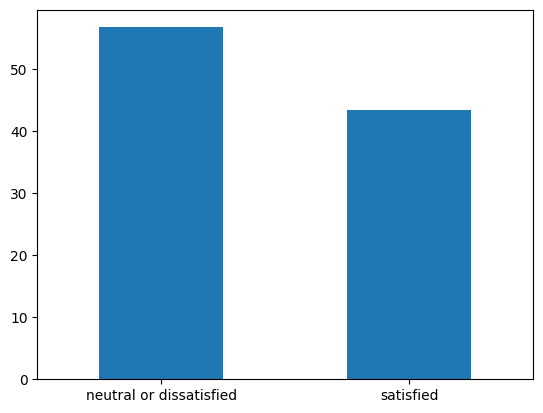

In [13]:
# Veamos la proporcion de la variable objetivo
print(round(pd.value_counts(data["satisfaction"],sort=True)/len(data)*100,2))
round(pd.value_counts(data["satisfaction"],sort=True)/len(data)*100,2).plot(kind="bar",rot=0)
plt.show()

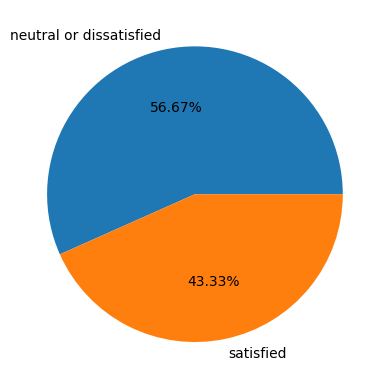

In [14]:
# Data no desbaceada
plt.pie(data.satisfaction.value_counts(), labels=["neutral or dissatisfied", "satisfied"], autopct = '%1.2f%%')
plt.show()

# Describir la data (adicionar)

# Imputación

In [15]:
round((data.isna().sum()/len(data))*100,3)

Gender                               0.000
Customer Type                        0.000
Age                                  0.000
Type of Travel                       0.000
Class                                0.000
Flight Distance                      0.000
Inflight wifi service                0.000
Departure/Arrival time convenient    0.000
Ease of Online booking               0.000
Gate location                        0.000
Food and drink                       0.000
Online boarding                      0.000
Seat comfort                         0.000
Inflight entertainment               0.000
On-board service                     0.000
Leg room service                     0.000
Baggage handling                     0.000
Checkin service                      0.000
Inflight service                     0.000
Cleanliness                          0.000
Departure Delay in Minutes           0.000
Arrival Delay in Minutes             0.298
satisfaction                         0.000
dtype: floa

In [16]:
# Como el porcentaje de los calores vacios es menor al 1% podriamos eliminar o reemplaxar por la mediana estos valores
data = data.dropna()

In [17]:
round((data.isna().sum()/len(data))*100,3)

Gender                               0.0
Customer Type                        0.0
Age                                  0.0
Type of Travel                       0.0
Class                                0.0
Flight Distance                      0.0
Inflight wifi service                0.0
Departure/Arrival time convenient    0.0
Ease of Online booking               0.0
Gate location                        0.0
Food and drink                       0.0
Online boarding                      0.0
Seat comfort                         0.0
Inflight entertainment               0.0
On-board service                     0.0
Leg room service                     0.0
Baggage handling                     0.0
Checkin service                      0.0
Inflight service                     0.0
Cleanliness                          0.0
Departure Delay in Minutes           0.0
Arrival Delay in Minutes             0.0
satisfaction                         0.0
dtype: float64

In [18]:
data.shape

(103594, 23)

In [19]:
# Dividir la data en numerica y categorica
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'category']
numerical_columns.remove('satisfaction')
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'category']
data_describe = data.describe(include = ['category'])

In [20]:
# Divir las columnas categoricas en binarias y no binarias
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print("Binary:\t\t",binary_columns)
print("No binary:\t",nonbinary_columns)

Binary:		 ['Gender', 'Customer Type', 'Type of Travel']
No binary:	 ['Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']


In [21]:
# Codificación
original_data = data[binary_columns].copy()
data[binary_columns] = data[binary_columns].astype('category').apply(lambda x: x.cat.codes)
data[binary_columns] = data[binary_columns].astype('category')

In [22]:
# Tabla de equivalencia
list_transformation = []
list_transformation = [(col, val, code) for col in binary_columns
                                        for val, code in zip(original_data[col].unique(), data[col].unique())]

df_transform = pd.DataFrame(list_transformation, columns=["Nombre columna", "Valor Original", "Categoria"])
df_transform

,Nombre columna,Valor Original,Categoria
0,Gender,Male,1
1,Gender,Female,0
2,Customer Type,Loyal Customer,0
3,Customer Type,disloyal Customer,1
4,Type of Travel,Personal Travel,1
5,Type of Travel,Business travel,0


In [23]:
data[binary_columns].describe()

,Gender,Customer Type,Type of Travel
count,103594,103594,103594
unique,2,2,2
top,0,0,0
freq,52576,84662,71465


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103594 non-null  category
 1   Customer Type                      103594 non-null  category
 2   Age                                103594 non-null  int64   
 3   Type of Travel                     103594 non-null  category
 4   Class                              103594 non-null  category
 5   Flight Distance                    103594 non-null  int64   
 6   Inflight wifi service              103594 non-null  category
 7   Departure/Arrival time convenient  103594 non-null  category
 8   Ease of Online booking             103594 non-null  category
 9   Gate location                      103594 non-null  category
 10  Food and drink                     103594 non-null  category
 11  Online boarding           

In [25]:
# No binary
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Class_Business', 'Class_Eco', 'Class_Eco Plus',
       'Inflight wifi service_0', 'Inflight wifi service_1',
       'Inflight wifi service_2', 'Inflight wifi service_3',
       'Inflight wifi service_4', 'Inflight wifi service_5',
       'Departure/Arrival time convenient_0',
       'Departure/Arrival time convenient_1',
       'Departure/Arrival time convenient_2',
       'Departure/Arrival time convenient_3',
       'Departure/Arrival time convenient_4',
       'Departure/Arrival time convenient_5', 'Ease of Online booking_0',
       'Ease of Online booking_1', 'Ease of Online booking_2',
       'Ease of Online booking_3', 'Ease of Online booking_4',
       'Ease of Online booking_5', 'Gate location_0', 'Gate location_1',
       'Gate location_2', 'Gate location_3', 'Gate location_4',
       'Gate location_5', 'Food and drink_0', 'Food and drink_1',
       'Food and drink_2', 'Food and drink_3', 'Food and drink_4',
       'Food and drink_5', 'Online boarding_0', 'Online board

In [26]:
len(data_nonbinary.columns)

86

# Standardization

In [27]:
data_numerical = data[numerical_columns]

In [28]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [29]:
target = data['satisfaction']
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(103594, 93)


In [30]:
target

0         neutral or dissatisfied
1         neutral or dissatisfied
2                       satisfied
3         neutral or dissatisfied
4                       satisfied
                   ...           
103899    neutral or dissatisfied
103900                  satisfied
103901    neutral or dissatisfied
103902    neutral or dissatisfied
103903    neutral or dissatisfied
Name: satisfaction, Length: 103594, dtype: object

In [41]:
# Se obtiene el Target y las caracteristicas
features = data.columns.tolist()
features

['Age',
 'Flight Distance',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'Class_Business',
 'Class_Eco',
 'Class_Eco Plus',
 'Inflight wifi service_0',
 'Inflight wifi service_1',
 'Inflight wifi service_2',
 'Inflight wifi service_3',
 'Inflight wifi service_4',
 'Inflight wifi service_5',
 'Departure/Arrival time convenient_0',
 'Departure/Arrival time convenient_1',
 'Departure/Arrival time convenient_2',
 'Departure/Arrival time convenient_3',
 'Departure/Arrival time convenient_4',
 'Departure/Arrival time convenient_5',
 'Ease of Online booking_0',
 'Ease of Online booking_1',
 'Ease of Online booking_2',
 'Ease of Online booking_3',
 'Ease of Online booking_4',
 'Ease of Online booking_5',
 'Gate location_0',
 'Gate location_1',
 'Gate location_2',
 'Gate location_3',
 'Gate location_4',
 'Gate location_5',
 'Food and drink_0',
 'Food and drink_1',
 'Food and drink_2',
 'Food and drink_3',
 'Food and drink_4',
 'Food and drink_5',
 'Online boarding_0',
 'Online b

# Split data: training and test

In [31]:
X = data
y = target
N, d = X.shape
N, d
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [32]:
y.shape

(103594,)

In [33]:
N_train = 36000
N_test = 4000

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = N_train, test_size = N_test,
                                                    stratify = y, random_state = 2023)

X_train.shape, X_test.shape

((36000, 93), (4000, 93))

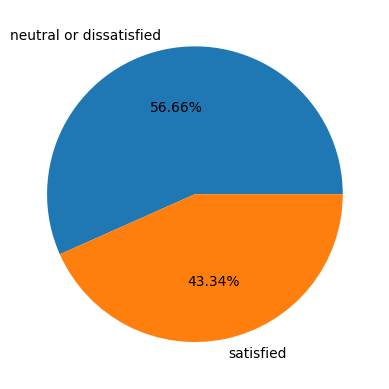

In [35]:
# Revision de muestro de ditribucion de la data
plt.pie(y_train.value_counts(), labels=["neutral or dissatisfied", "satisfied"], autopct = '%1.2f%%')
plt.show()

# Modelo de Neural Network

In [ ]:
# Se realizara el ajuste de hiperparametros, por ello se empezara con una red de una capa y de 50 neuronas para encontrar el alpha optimo.
# Esto con los siguientes parametros de solver, Iteracion, activacion y la semilla de aletoriedad por donde empieza.
%%time
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha,
                              hidden_layer_sizes = 50,
                              solver = 'lbfgs',
                              max_iter = 1000,
                              activation = 'logistic',
                              random_state = 42)


    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

CPU times: user 13min 55s, sys: 5min 47s, total: 19min 43s
Wall time: 11min 49s


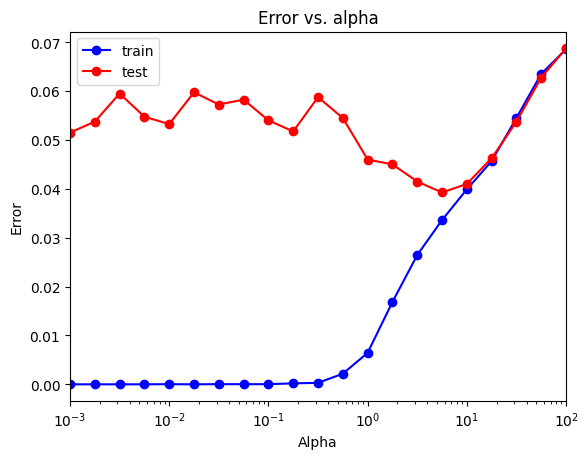

In [ ]:
# Se plotea el error del Test y del Train con el modelo anterior para cada una de las alphas que se tomo.
# Se observa que el error empieza a crecer entre un alpha de 0 a 10.
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.legend()
pass

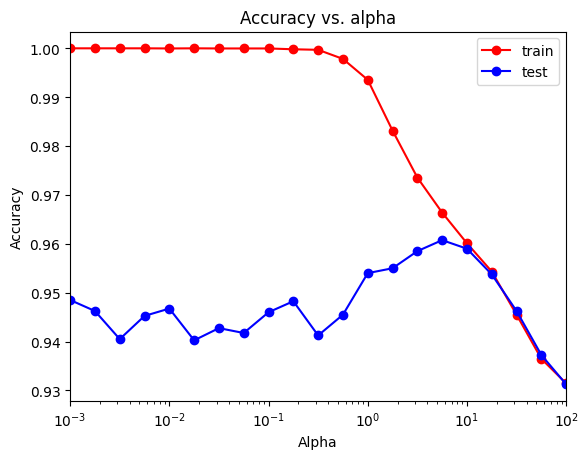

In [ ]:
# Se grafica el accuracy para el test y el train, para ver la relacion entre ambos y ver con que alpha empieza a decrecer.
# Se ve que empieza decrecer desde un alpha mayor a 10 aproximadamente.
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend()
pass

In [ ]:
# Luego como el acurracy no empeora respecto al rango tomado, se obtiene el menor error.
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Minimum error on the training set: ', min_train_err)
print('Minimum error on the testing set: ', min_test_err)

Minimum error on the training set:  0.0
Minimum error on the testing set:  0.03925


In [ ]:
# Con un error de cero se toma el valor del alpha.
alpha_local_opt = alpha_arr[test_err == min_test_err][0]
print('Optimal alpha value: ', alpha_local_opt)

Optimal alpha value:  5.623413251903491


In [ ]:
# Se corre el modelo con el alpha obtenido
%%time
mlp_model = MLPClassifier(alpha = alpha_local_opt,
                          hidden_layer_sizes = 50,
                          solver = 'lbfgs',
                          max_iter = 1000,
                          activation = 'logistic',
                          random_state = 42)

mlp_model.fit(X_train, y_train)

CPU times: user 40.3 s, sys: 17.5 s, total: 57.8 s
Wall time: 35.5 s


MLPClassifier(activation='logistic', alpha=5.623413251903491,
              hidden_layer_sizes=50, max_iter=1000, random_state=42,
              solver='lbfgs')

In [ ]:
# Se obtiene el error del modelo que corrio con el alpha optimo
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

err_train = np.mean(y_train != y_train_pred)
err_test = np.mean(y_test != y_test_pred)

print('Error on the training set: ', err_train)
print('Error on the testing set: ', err_test)

Error on the training set:  0.03361111111111111
Error on the testing set:  0.03925


In [ ]:
# Luego con el alpha optimo se corre una lista de numero de neuronas que nos pueda dar el mas óptimo.
%%time
hidden_layer = np.arange(1, 51)
test_err = []
train_err = []
train_acc = []
test_acc = []

for size in hidden_layer:
    mlp_model = MLPClassifier(alpha = alpha_local_opt,
                              hidden_layer_sizes = size,
                              solver = 'lbfgs',
                              max_iter = 1000,
                              activation = 'logistic',
                              random_state = 42)


    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

CPU times: user 17min 23s, sys: 6min 51s, total: 24min 15s
Wall time: 14min 34s


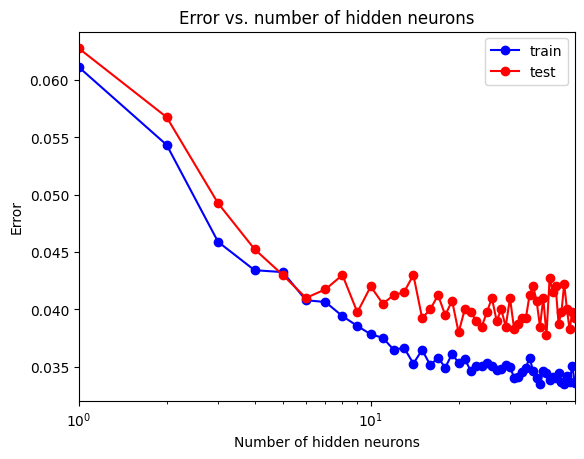

In [ ]:
# Graficamos el error y se puede observar que en este caso decrece a diferencia del alpha. Se tomara el primer minimo.
plt.semilogx(hidden_layer, train_err, 'b-o', label = 'train')
plt.semilogx(hidden_layer, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer), np.max(hidden_layer)])
plt.title('Error vs. number of hidden neurons')
plt.xlabel('Number of hidden neurons')
plt.ylabel('Error')
plt.legend()
pass

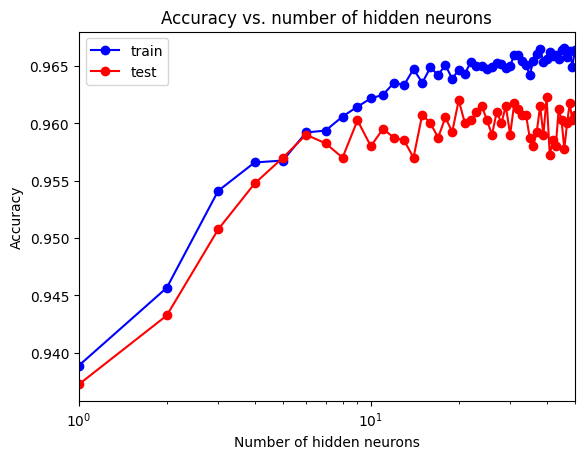

In [ ]:
#Igualmente esta grafica a la inversa alpha el Accuracy aumenta cuando aumenta las neuronas, se tomara el mayor accuracy con menos neuronas.
plt.semilogx(hidden_layer, train_acc, 'b-o', label = 'train')
plt.semilogx(hidden_layer, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer), np.max(hidden_layer)])
plt.title('Accuracy vs. number of hidden neurons')
plt.xlabel('Number of hidden neurons')
plt.ylabel('Accuracy')
plt.legend()
pass

In [ ]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Minimum error on the training set: ', min_train_err)
print('Minimum error on the testing set: ', min_test_err)

Minimum error on the training set:  0.03347222222222222
Minimum error on the testing set:  0.03775


In [ ]:
# Con lo comentado se obtiene el menor valor optimo de numero de neuronas
hidden_layer_local_opt_1 = hidden_layer[test_err == min_test_err][0]
print('The optimal value of the neurons number in the hidden layer: ', hidden_layer_local_opt_1)

The optimal value of the neurons number in the hidden layer:  40


In [ ]:
%%time
mlp_model = MLPClassifier(alpha = alpha_local_opt,
                          hidden_layer_sizes = hidden_layer_local_opt_1,
                          solver = 'lbfgs',
                          max_iter = 1000,
                          activation = 'logistic',
                          random_state = 42)

mlp_model.fit(X_train, y_train)

CPU times: user 26.5 s, sys: 10.8 s, total: 37.3 s
Wall time: 24.7 s


MLPClassifier(activation='logistic', alpha=5.623413251903491,
              hidden_layer_sizes=40, max_iter=1000, random_state=42,
              solver='lbfgs')

In [ ]:
# Se obtiene el error con el nuevo modelo.
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

err_train = np.mean(y_train != y_train_pred)
err_test = np.mean(y_test != y_test_pred)

print('Error on the training set: ', err_train)
print('Error on the testing set: ', err_test)

Error on the training set:  0.034444444444444444
Error on the testing set:  0.03775


In [ ]:
# Finalmente se agrega una capa mas para mejorar el modelo y se corre una cantidad de neuronas de 1 a 50.
%%time
hidden_layer = np.arange(1, 51)
test_err = []
train_err = []
train_acc = []
test_acc = []

for size in hidden_layer:
    mlp_model = MLPClassifier(alpha = alpha_local_opt,
                              hidden_layer_sizes = (hidden_layer_local_opt_1, size),
                              solver = 'lbfgs',
                              max_iter = 1000,
                              activation = 'logistic',
                              random_state = 42)

    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

CPU times: user 1h 49min 35s, sys: 44min 47s, total: 2h 34min 23s
Wall time: 1h 32min 6s


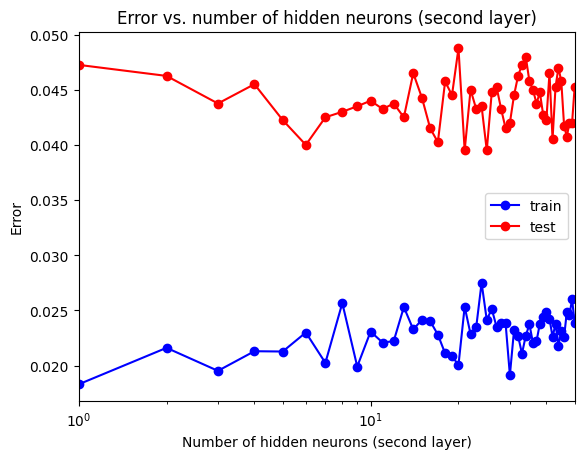

In [ ]:
# Con las graficas se observa que el error casi se mantiene constante, de igual forma se toma el primer error minmo optimo.
plt.semilogx(hidden_layer, train_err, 'b-o', label = 'train')
plt.semilogx(hidden_layer, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer), np.max(hidden_layer)])
plt.title('Error vs. number of hidden neurons (second layer)')
plt.xlabel('Number of hidden neurons (second layer)')
plt.ylabel('Error')
plt.legend()
pass

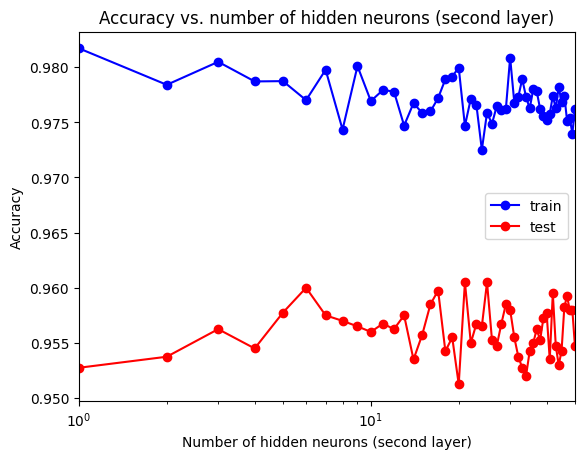

In [ ]:
# Igualmente con el Accuracy se ve que no aumenta demasiado y casi esta constante.
plt.semilogx(hidden_layer, train_acc, 'b-o', label = 'train')
plt.semilogx(hidden_layer, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer), np.max(hidden_layer)])
plt.title('Accuracy vs. number of hidden neurons (second layer)')
plt.xlabel('Number of hidden neurons (second layer)')
plt.ylabel('Accuracy')
plt.legend()
pass

In [ ]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print('Minimum error on the training set: ', min_train_err)
print('Minimum error on the testing set: ', min_test_err)

Minimum error on the training set:  0.018305555555555554
Minimum error on the testing set:  0.0395


In [ ]:
# Se obtiene el minimo numero de neuronas para la segunda capa.
hidden_layer_local_opt_2 = hidden_layer[test_err == min_test_err][0]
print('The optimal value of the number of neurons in the second hidden layer: ', hidden_layer_local_opt_2)

The optimal value of the number of neurons in the second hidden layer:  21


In [36]:
alpha_local_opt = 5.623413251903491
hidden_layer_local_opt_1 = 40
hidden_layer_local_opt_2 = 21

In [37]:
# Se corre el modelo con los hiperparametros optimos y se corre con la data para ver los resultados estadisticos del modelo.
%%time
mlp_model = MLPClassifier(alpha = alpha_local_opt,
                          hidden_layer_sizes = (hidden_layer_local_opt_1, hidden_layer_local_opt_2),
                          solver = 'lbfgs',
                          max_iter = 1000,
                          activation = 'logistic',
                          random_state = 42)

mlp_model.fit(X_train, y_train)

CPU times: user 2min 16s, sys: 51 s, total: 3min 7s
Wall time: 2min 7s


MLPClassifier(activation='logistic', alpha=5.623413251903491,
              hidden_layer_sizes=(40, 21), max_iter=1000, random_state=42,
              solver='lbfgs')

## Evaluacion del modelo

In [42]:
# Usando el modelo para predecir

X_train['probability'] = mlp_model.predict_proba(X_train[features])[:,1]
X_test['probability']  = mlp_model.predict_proba(X_test[features])[:,1]

X_train['prediction'] = mlp_model.predict(X_train[features])
X_test['prediction']  = mlp_model.predict(X_test[features])

In [45]:
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
#Resumen de todas las métricas del modelo

metricsRfc = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'nn_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction,pos_label='satisfied'),
                                        recall_score(y_train, X_train.prediction, pos_label='satisfied'),
                                        f1_score(y_train, X_train.prediction, pos_label='satisfied')],

                                'nn_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction, pos_label='satisfied'),
                                        recall_score(y_test, X_test.prediction, pos_label='satisfied'),
                                        f1_score(y_test, X_test.prediction, pos_label='satisfied')]})

metricsRfc

,metric,nn_train,nn_test
0,AUC,0.997537,0.993486
1,Gini,0.995073,0.986972
2,Accuracy,0.974806,0.959750
3,Precision,0.980197,0.959136
4,Recall,0.961287,0.947520
5,F1-score,0.970650,0.953293
